### House Sales - Exploratory Data Analysis

When it comes to sell you properties (houses), several factors might come as consideration points.
In this case, we want to figure out how prices are impacted by many features, i.e. Floors, grade, amount of bath- & bedrooms, etc.


### Problem Statement
Confirming the prices, House features should be further investigated. Picking the right price range when searching for a new house is really necessecary because if you don't, you could miss out on finding the right home. You also don't want to waste time looking at homes that don't fit your criteria because they cost more than you want to pay.


### Goals
Finaly, we want to analize these factors, in order to label the prices.This observation will compare the values of homes in King County and what are the factors that impacting price of a house in King County to predict market price prediction with help of machine learning modeling. 

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import set_config
set_config(print_changed_only=False)

import warnings
warnings.filterwarnings('ignore')

df =pd.read_csv('kc_house_data.csv',parse_dates = ['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## DATA EXPLORATORY ANALYSIS

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [34]:
df.shape

(21613, 21)

In [35]:
## Checking Missing Value

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [37]:
HouseSalesDesc=[]

for i in df.columns:
    HouseSalesDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=HouseSalesDesc,columns=[
    'Data Feature', 'Data Types', 'Null','Null Percentages','Unique','Unique Sample'
])

,Data Feature,Data Types,Null,Null Percentages,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[114100234, 2492200280]"
1,date,datetime64[ns],0,0.0,372,"[2014-10-15T00:00:00.000000000, 2015-02-13T00:..."
2,price,float64,0,0.0,4028,"[1087500.0, 443000.0]"
3,bedrooms,int64,0,0.0,13,"[4, 11]"
4,bathrooms,float64,0,0.0,30,"[0.0, 4.5]"
5,sqft_living,int64,0,0.0,1038,"[1489, 3380]"
6,sqft_lot,int64,0,0.0,9782,"[13286, 5085]"
7,floors,float64,0,0.0,6,"[3.5, 3.0]"
8,waterfront,int64,0,0.0,2,"[1, 0]"
9,view,int64,0,0.0,5,"[3, 2]"


In [38]:
# # Getting all the unique value of the columns 

# for column in df.columns:
#     print(f"{column} :")
#     print(df[column].unique())
#     print("")

### Checking and Handling Outlier 

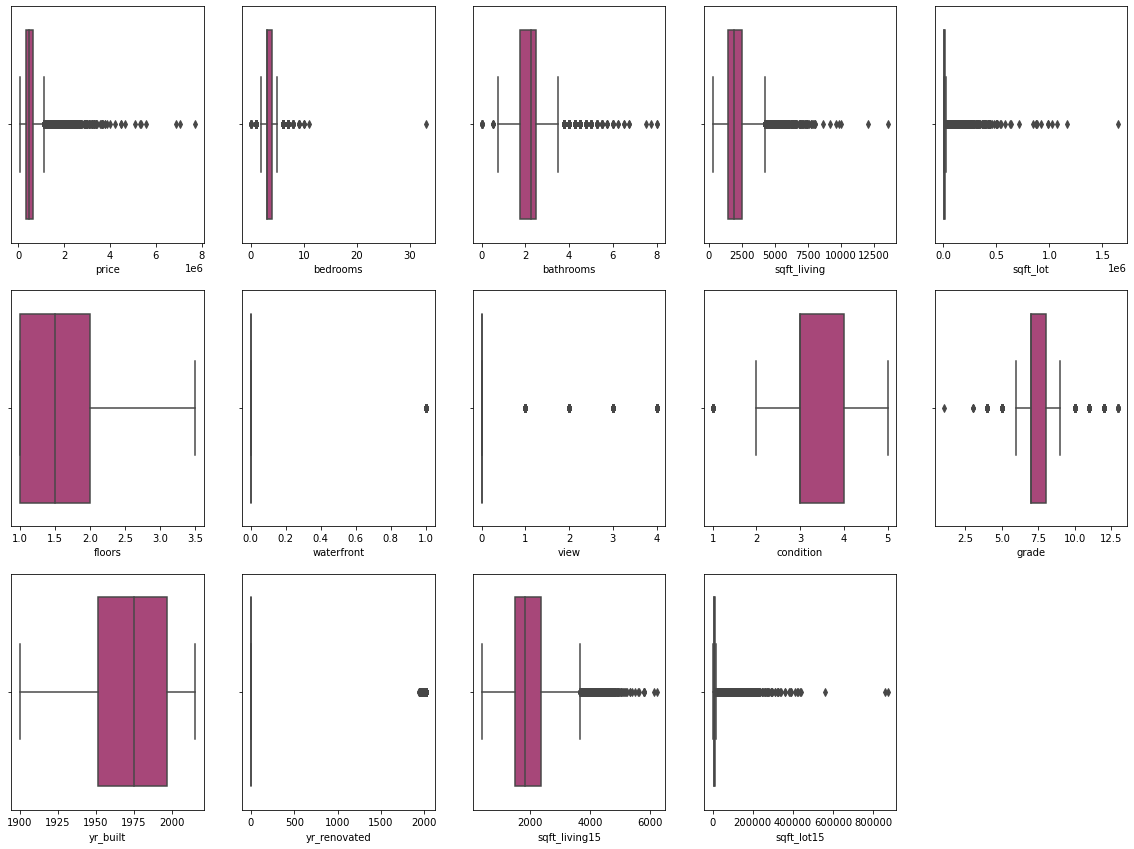

In [39]:
# ploting boxplot for all the columns to see distribution of the data in each columns 

df_describe = df.drop(columns = ['id', 'date', 'lat','long', 'zipcode','sqft_above','sqft_basement'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(x=df_describe[column], palette='magma')
    x+=1
plt.tight_layout
plt.show()

# from this box plot below we can see there are outliers in many of the columns
# i will not remove the outliers in the columns since its common to have outliers when it comes to house sales in real life

## Data Preparation

- Replacing all houses with 0 bathroom and 0 bedroom with Missing Value, further step: drop it

- Drop Multicolinear columns, such as sqft_above and sqft_basement, since we already have sqft_living, which sqft_living is the substraction of sqft_above and sqft_basement

- Define price per squarefeet

- Binning Price Columns

In [40]:
df['bedrooms'] = df['bedrooms'].replace(0, np.nan)
df['bathrooms'] = df['bathrooms'].replace(0, np.nan)

In [41]:
df.isna().sum()

id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [42]:
df.dropna(inplace=True)

In [43]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [44]:
drop=['sqft_above','sqft_basement']
df.drop(drop, axis=1,inplace=True)

In [45]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
# Define price/sqft_lot

df['price/sqrft']=df['price']/df['sqft_lot']

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqrft
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,39.274336
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639,74.288870
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,18.000000
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,120.800000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,63.118812


In [47]:
# Binning Price (per million)

bin_price =[0,500000,1000000,1500000, 2000000, 2500000, 3000000, 3500000,df['price'].max()]
label_price = ['up to 500k', 'up to 1 mil', 'up to 1.5 mil','up to 2 mil','up to 2.5 mil', 'up to 3 mil','up to 3.5 mil','more than 3.5 mil']

df['price_group'] = pd.cut(df['price'], bins = bin_price, labels = label_price)
df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqrft,price_group
15501,2581900235,2014-11-10,1075000.0,4.0,2.75,2580,8100,2.0,0,1,...,8,1964,0,98040,47.5387,-122.215,2840,10006,132.716049,up to 1.5 mil


In [48]:
df[df['price']>7000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqrft,price_group
3914,9808700762,2014-06-11,7062500.0,5.0,4.5,10040,37325,2.0,1,2,...,11,1940,2001,98004,47.6500,-122.214,3930,25449,189.216343,more than 3.5 mil
7252,6762700020,2014-10-13,7700000.0,6.0,8.0,12050,27600,2.5,0,3,...,13,1910,1987,98102,47.6298,-122.323,3940,8800,278.985507,more than 3.5 mil


# Crosstab Analysis

In [49]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price/sqrft', 'price_group'],
      dtype='object')

In [50]:
((df[['bedrooms','price']].groupby(['bedrooms']).mean())*100).round(2).sort_values(by='bedrooms',ascending=False)

,price
bedrooms,
33.0,6.400000e+07
11.0,5.200000e+07
10.0,8.193333e+07
9.0,8.939998e+07
8.0,1.105077e+08
7.0,9.511847e+07
6.0,8.255206e+07
5.0,7.865998e+07
4.0,6.354195e+07


Amount of bedroom do not define the price of the houses.

In [51]:
(pd.crosstab(index=df['grade'],columns= 'Mean Price',values=df['price'],aggfunc='mean')*100).round(2)

col_0,Mean Price
grade,
3,2.620000e+07
4,2.120019e+07
5,2.485240e+07
6,3.019196e+07
7,4.025921e+07
8,5.429440e+07
9,7.735132e+07
10,1.071771e+08
11,1.496842e+08


Higher Grade means better house, which also define house's price.

In [52]:
(pd.crosstab(index=df['waterfront'],columns= 'Mean Price',values=df['price'],aggfunc='mean')*100).round(2)

col_0,Mean Price
waterfront,
0,5.316729e+07
1,1.661876e+08


In [53]:
pd.crosstab(index=df['bedrooms'],columns='Mean Price',values=df['price'],aggfunc='mean')

col_0,Mean Price
bedrooms,
1.0,3.182242e+05
2.0,4.013727e+05
3.0,4.662321e+05
4.0,6.354195e+05
5.0,7.865998e+05
6.0,8.255206e+05
7.0,9.511847e+05
8.0,1.105077e+06
9.0,8.939998e+05


In [54]:
pd.crosstab(index=df['view'],columns='Mean Price',values=df['price'],aggfunc='mean')

col_0,Mean Price
view,
0,4.966805e+05
1,8.122808e+05
2,7.925151e+05
3,9.719653e+05
4,1.463711e+06


Better view increases the price.

In [55]:
pd.crosstab(index=df['floors'],columns='Mean Price',values=df['price'],aggfunc='mean')

col_0,Mean Price
floors,
1.0,4.423194e+05
1.5,5.589806e+05
2.0,6.490257e+05
2.5,1.060346e+06
3.0,5.833395e+05
3.5,9.102143e+05


Assumed that higher houses have to be more expensive, in this case that assumption is declined.

# Mapping

## Based on Price Group

In [126]:
import folium

map_seattle = folium.Map(location = [47.5, -122.2], zoom_start = 10)

df_group1 =df[df['price_group'] == 'up to 500k']
df_group2 =df[df['price_group'] == 'up to 1 mil']
df_group3 =df[df['price_group'] == 'up to 1.5 mil']
df_group4 =df[df['price_group'] == 'up to 2 mil']
df_group5 =df[df['price_group'] == 'up to 2.5 mil']
df_group6 =df[df['price_group'] == 'up to 3 mil']
df_group7 =df[df['price_group'] == 'up to 3.5 mil']
df_group8 =df[df['price_group'] == 'more than 3.5 mil']

for index, row in df_group1.sample(n=50).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(prefix = 'fa', color = 'red',size=1)).add_to(map_seattle)
for index, row in df_group2.sample(n=50).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(prefix = 'fa', color = 'gold',size=1)).add_to(map_seattle)
for index, row in df_group3.sample(n=50).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(prefix = 'fa', color = 'green',size=1)).add_to(map_seattle)
for index, row in df_group4.sample(n=50).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(prefix = 'fa', color = 'blue',size=1)).add_to(map_seattle)
for index, row in df_group5.sample(n=50).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(prefix = 'fa', color = 'cyan',size=1)).add_to(map_seattle)
for index, row in df_group6.sample(n=50).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(prefix = 'fa', color = 'black',size=1)).add_to(map_seattle)
for index, row in df_group7.iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(prefix = 'fa', color = 'white',size=1)).add_to(map_seattle)
for index, row in df_group8.iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(prefix = 'fa', color = 'purple',size=4)).add_to(map_seattle)
map_seattle

## Price Distribution Visualization

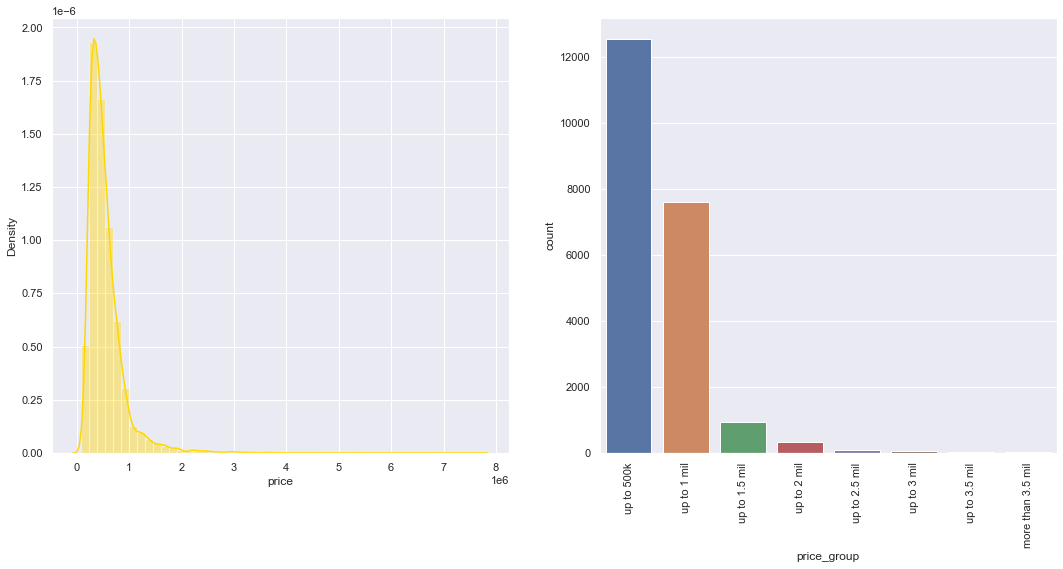

In [128]:
plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
sns.distplot(df['price'], color='gold')
plt.subplot (1,2,2)
plt.xticks(rotation=90)
(sns.countplot(df['price_group']))
plt.show()

Most houses are below 1 millions.

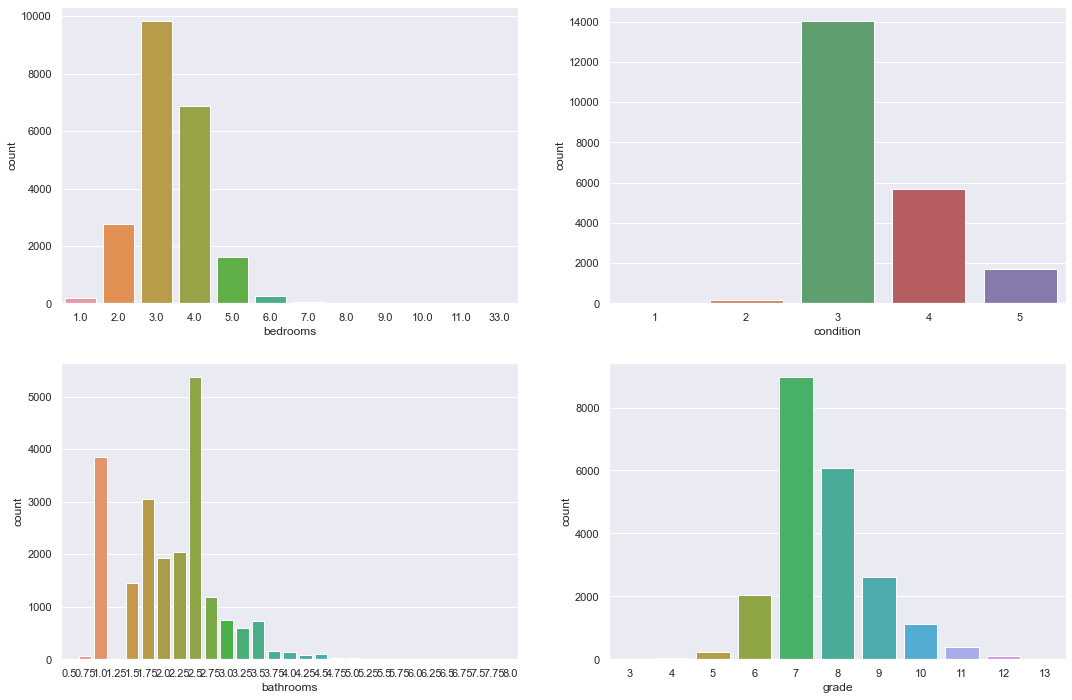

In [129]:
plt.figure(figsize = (18, 12))

plt.subplot(2,2,1)
sns.countplot(df['bedrooms'])

plt.subplot(2,2,2)
sns.countplot(df['condition'])

plt.subplot(2,2,3)
sns.countplot(df['bathrooms'])

plt.subplot(2,2,4)
sns.countplot(df['grade'])

plt.show()

Most houses have 4 bedrooms and have only 1 floor and 2 floors respectively. Not only Average house's grade (between 7-9), but also most houses are to be found as majority.

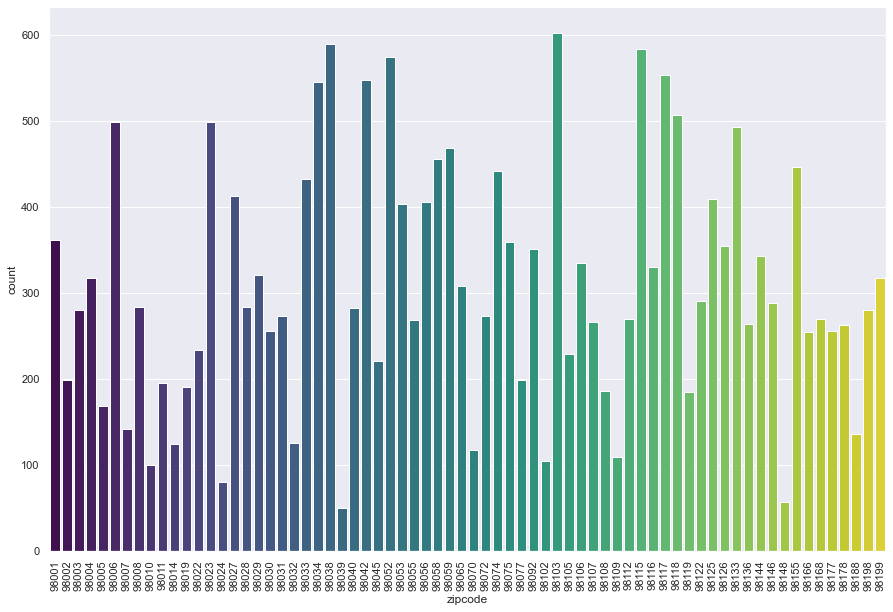

In [131]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)

sns.countplot(df['zipcode'],palette='viridis',orient='h')
plt.show()

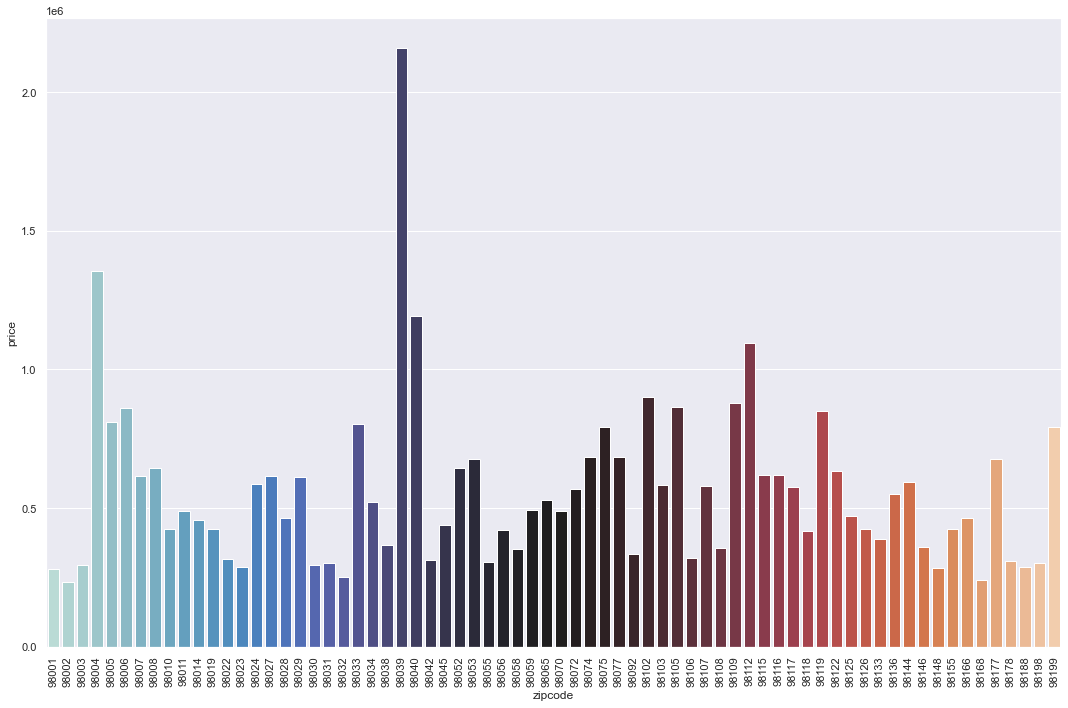

In [132]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'zipcode', y= 'price', data = df, palette = 'icefire',ci = False)
plt.xticks(rotation = 90)
plt.tight_layout()

## Correlation Heatmap

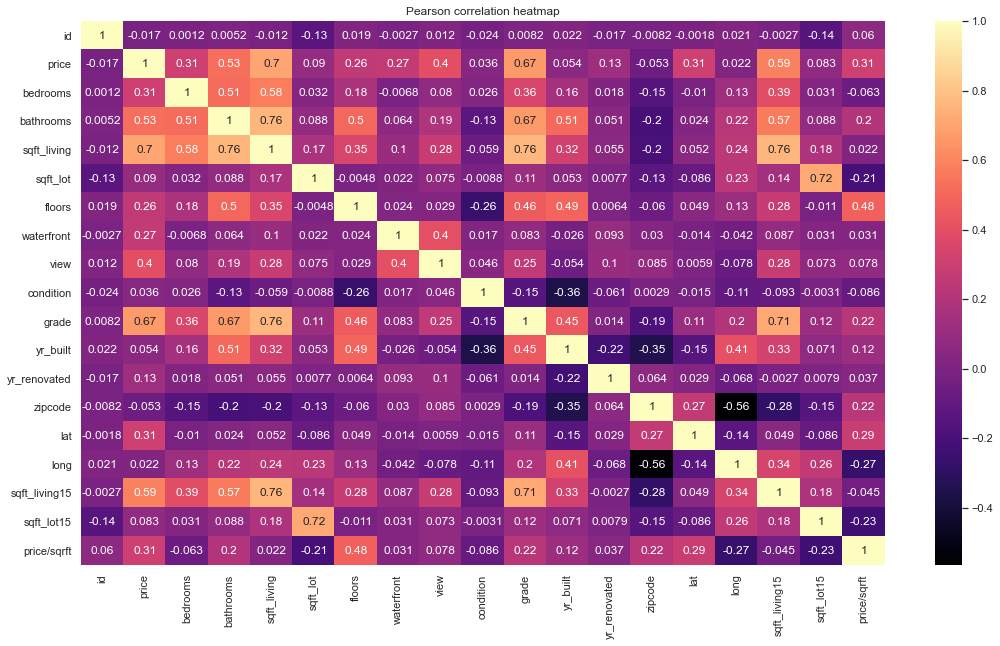

In [120]:
df.corr()

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.title('Pearson correlation heatmap')
plt.show()

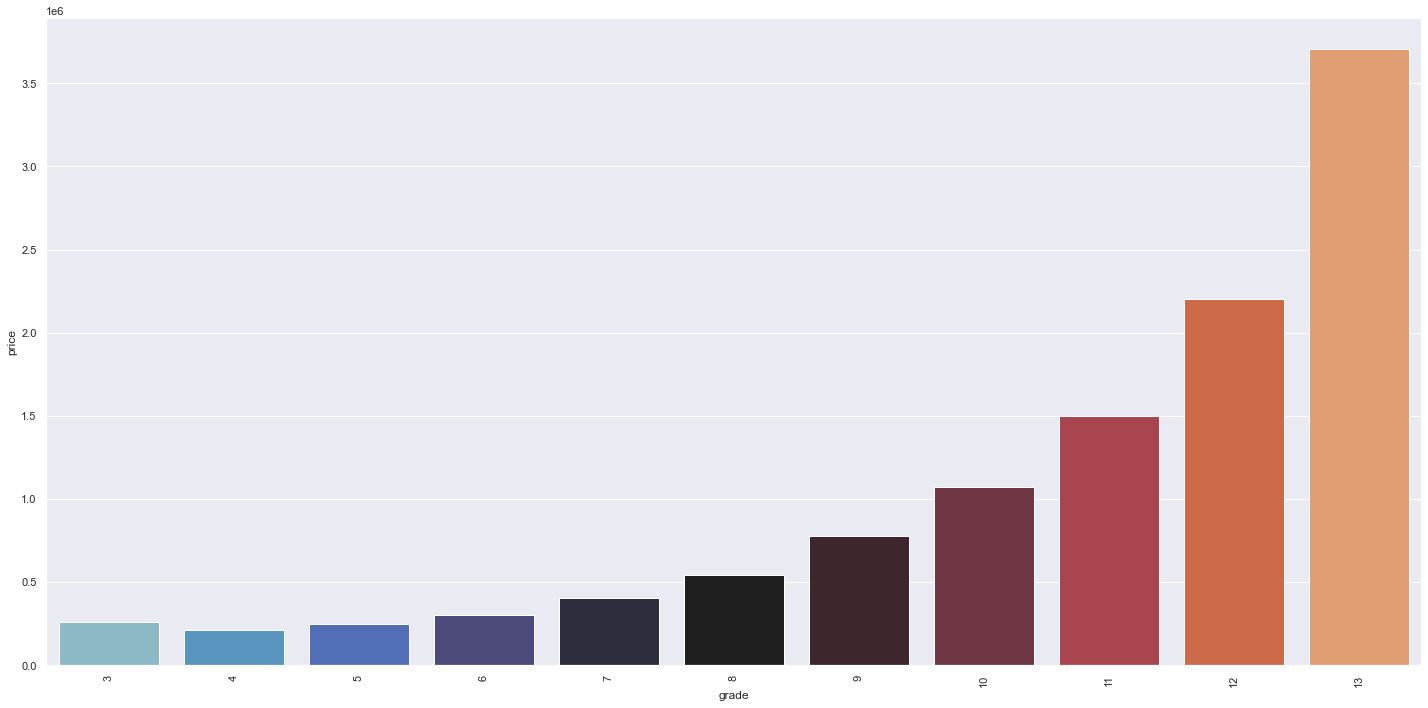

In [121]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'grade', y= 'price', data = df, palette = 'icefire',ci = False)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

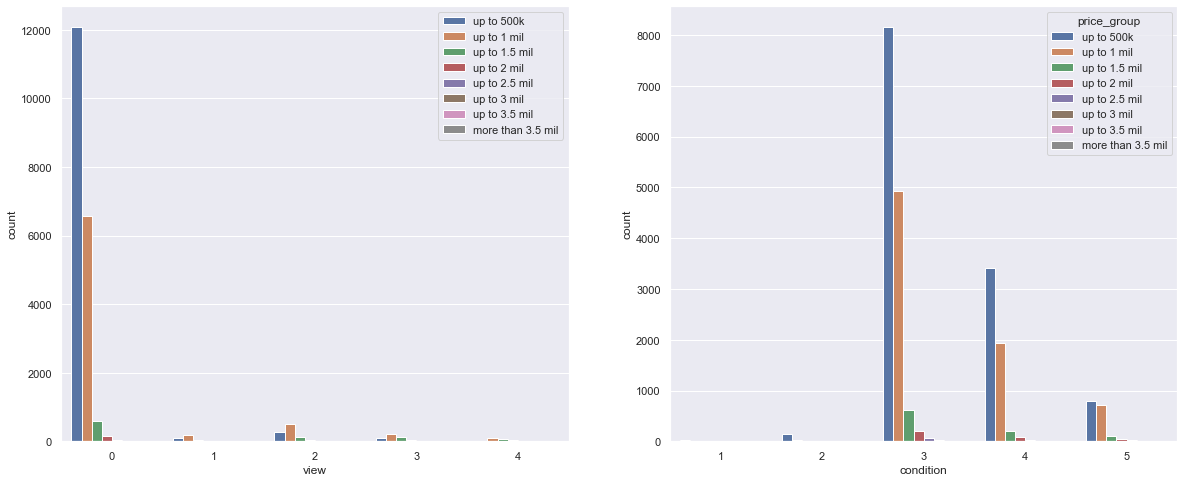

In [122]:
plt.figure(figsize = (20, 8))

plt.subplot(1,2,1)
sns.countplot(x = df['view'], hue = 'price_group', data = df)
plt.legend(loc='best')

plt.subplot(1,2,2)
sns.countplot(x = df['condition'], hue = 'price_group', data = df)

plt.show()

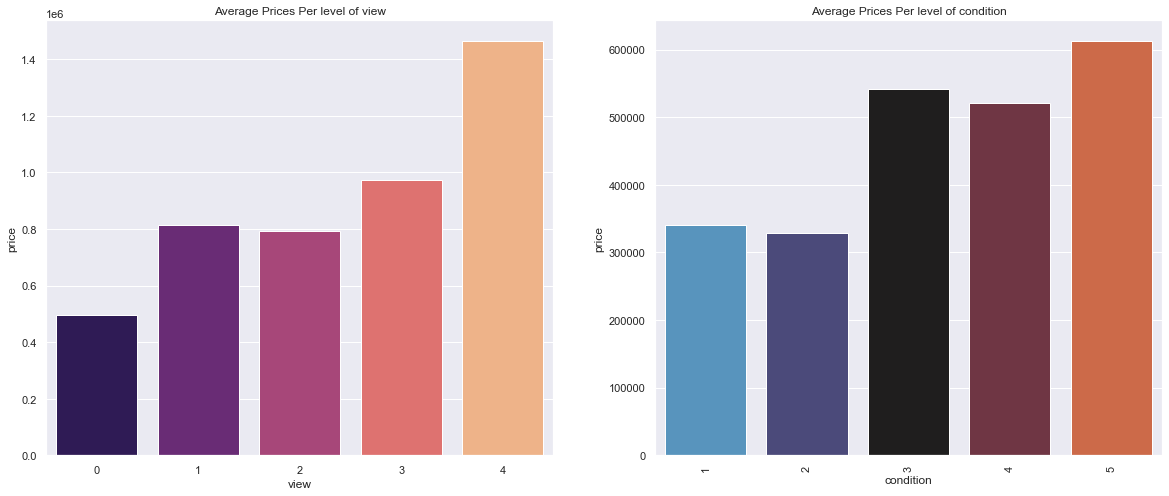

In [123]:
plt.figure(figsize = (20, 8))
plt.subplot(1,2,1)
sns.barplot(x = 'view', y='price', data = df, ci = False, palette = 'magma')
plt.title('Average Prices Per level of view')
plt.subplot(1,2,2)
sns.barplot(x = 'condition', y='price', data = df, ci = False, palette = 'icefire')
plt.xticks(rotation = 90)
plt.title('Average Prices Per level of condition')

plt.show()

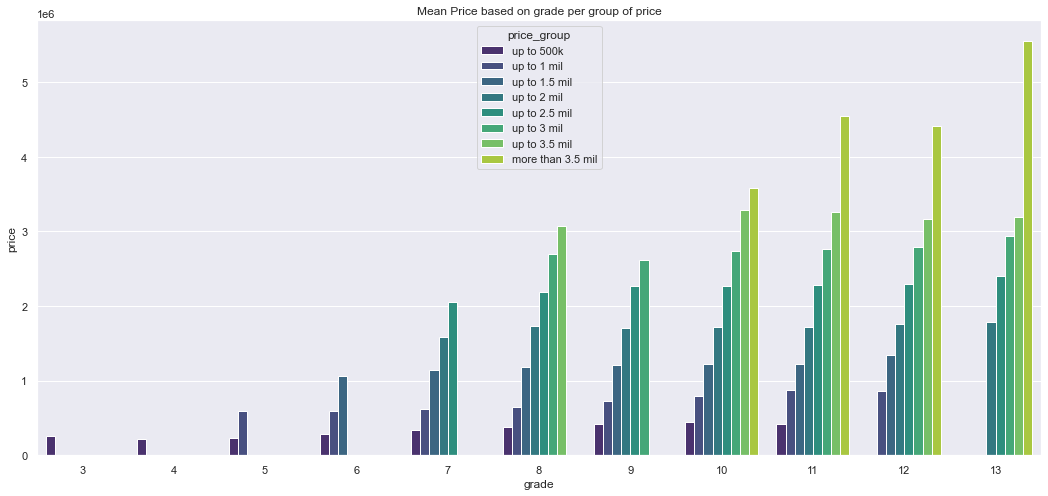

In [124]:
plt.figure(figsize = (18, 8))
sns.barplot(x = df['grade'], y = df['price'], hue = df['price_group'], palette='viridis',ci = False)
plt.title('Mean Price based on grade per group of price')
plt.show()

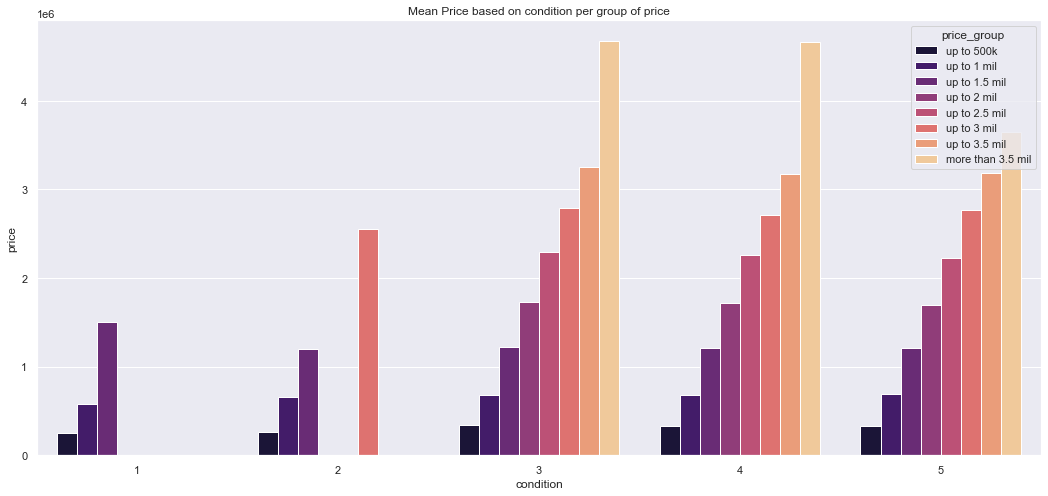

In [125]:
plt.figure(figsize = (18, 8))
sns.barplot(x = df['condition'], y = df['price'], hue = df['price_group'], ci = False,palette='magma')
plt.title('Mean Price based on condition per group of price')
plt.show()

## Conclusion:

    - Most houses are priced under 1 million USD.
    - Most houses have 4 bedrooms, 1 floor and 2 floors respectively. 
    - Not only Average house's grade (between 7-9), but also most houses are to be found as majority.
    - Most Houses located within area with zipcode 98103, 98115, 98038. 
    - 98083 zipcode, this area has the most Expensive mean price.
    - Grade is proportional compared to the price.
    - Condition and view included to other features highly correlated to price.
    - You are lucky enough, if your houses are having a beautiful view, it can boost your selling price.

## Recommendation
    - Before buying a house, you should investigate any further, how the prices are for your area (zipcode).
    - Before selling your house, it is better if your house are found in really good condition. 
        Better Quality = Better Selling Price.
    - You can add more price if you have beautiful view. It can boost the price up to 3 times.
    - If your house has only 1-2 bedrooms, try to renovate it by adding 1-2 more. 
        Then you get a higher chance, becoming one of the client's candidate.
  